# SENTIMENT CLASSIFICATION OF COVID-19 TWEETS

In [1]:
!pip install plotly
!pip install cufflinks
!pip install chart_studio
!pip install openpyxl
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install -U textblob
!python -m textblob.download_corpora
!pip install pandas
!pip install wordcloud
!pip install plotly==5.3.1
!pip install plotly
!pip install cufflinks
!pip install chart_studio


  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-ao0necaj
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-ao0necaj
  xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
ERROR: Command errored out with exit status 1: git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/mt/qw7xv63x7jvggcw3qnj7j2l40000gn/T/pip-req-build-ao0necaj Check the logs for full command output.
[nltk_data] Downloading package brown to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading pa

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import os
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import string
import re
import nltk
from bs4 import BeautifulSoup
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import plotly.express as pex
import urllib
import requests
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
pd.set_option("display.max_colwidth", None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bindupriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


import nltk
nltk.download('stopwords')

# NLTK VADER

In [3]:
# import nltk
# nltk.download('vader_lexicon') # Download the VADER lexicon
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# # Initialize sentiment intensity analyzer
# sia = SentimentIntensityAnalyzer()

# # Obtaining NLTK scores
# df_concat_all['nltk_scores'] = df_concat_all['newcontent'].apply(lambda x: sia.polarity_scores(x))

# # Obtaining NLTK compound score
# df_concat_all['nltk_cmp_score'] = df_concat_all['nltk_scores'].apply(lambda score_dict: score_dict['compound'])

# # Set threshold to define neutral sentiment
# neutral_thresh = 0.05

# # Categorize scores into the sentiments of positive, neutral or negative
# df_concat_all['nltk_sentiment'] = df_concat_all['nltk_cmp_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

In [4]:
# tweet_count = 1000
# text_query = "COVID-19 Vaccine"
# since_date = "2021-04-01"
# until_date = "2021-04-30"

# os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))

In [5]:
tweet_df = pd.read_excel('/Users/bindupriya/Desktop/clean.xlsx')


In [6]:
tweet_df.sample(5)

Unnamed: 0  Unnamed: 0.1  index                           _type  \
13806       13806         13806  13806  snscrape.modules.twitter.Tweet   
1485         1485          1485   1485  snscrape.modules.twitter.Tweet   
8495         8495          8495   8495  snscrape.modules.twitter.Tweet   
8573         8573          8573   8573  snscrape.modules.twitter.Tweet   
7942         7942          7942   7942  snscrape.modules.twitter.Tweet   

                                                                  url  \
13806   https://twitter.com/GrantSwanson88/status/1387893259918364679   
1485           https://twitter.com/mbadeau/status/1255611729116979200   
8495       https://twitter.com/icicoverage/status/1333162577992552449   
8573   https://twitter.com/catchingupwithz/status/1333157843000643584   
7942             https://twitter.com/PTVph/status/1322223237737099264   

                     date  \
13806 2021-04-29 22:15:13   
1485  2020-04-29 21:35:39   
8495  2020-11-29 21:35:02   
8573  2020-11-29 21:16:13   
7942  2020-10-30 17:06:00   

                                                                                                                                                                                                                                                          content  \
13806                                                                                                                                                                                               How Pfizer Makes Its Covid-19 Vaccine https://t.co/H2ZauS88li   
1485                   Wolf, Sir:\nWithout a vaccine for the New Corona Virus Covid 19\nMers\nSars\nPissing around testing is just meant to make a nervous nelly feel better.\nIt Is not the correct approach to stopping the spread.\n@wolfblitzer LIVE\nON @CNN   
8495   US based #reefer #container specialist the Klinge Corporation to ramp up production as demand for specialist low temperature containers is expected to grow with the coming distribution of #Covid-19 vaccines. By @container_news https://t.co/fS90VIVZOt   
8573                                                                                                                                                                                 UK to Approve Pfizer COVID-19 Vaccine Next Week | IE https://t.co/6y1O4JU19s   
7942                                                                                                                                                     #PTVNewsTonight | FDA warns vs. alleged COVID-19 vaccine being sold in market\n\nhttps://t.co/TGkvtG2d0f   

                                                                                                                                                                                                                                            renderedContent  \
13806                                                                                                                                                                                     How Pfizer Makes Its Covid-19 Vaccine nytimes.com/interactive/20…   
1485             Wolf, Sir:\nWithout a vaccine for the New Corona Virus Covid 19\nMers\nSars\nPissing around testing is just meant to make a nervous nelly feel better.\nIt Is not the correct approach to stopping the spread.\n@wolfblitzer LIVE\nON @CNN   
8495   US based #reefer #container specialist the Klinge Corporation to ramp up production as demand for specialist low temperature containers is expected to grow with the coming distribution of #Covid-19 vaccines. By @container_news ow.ly/dVHO50CwMuU   
8573                                                                                                                                                        UK to Approve Pfizer COVID-19 Vaccine Next Week | IE interestingengineering.com/uk-to-approve-…   
7942                                                                                                      

In [7]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (18000, 35)
Columns are: Index(['Unnamed: 0', 'Unnamed: 0.1', 'index', '_type', 'url', 'date',
       'content', 'renderedContent', 'id', 'user', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang',
       'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'newcontent', 'nltk_scores', 'nltk_cmp_score',
       'nltk_sentiment'],
      dtype='object')


# DROPPING UNNECESSARY COLUMNS

In [8]:
del tweet_df['Unnamed: 0']

In [9]:
del tweet_df['Unnamed: 0.1']

# CHECK NULL VALUES 

In [10]:
tweet_df.isna().sum() #newcontent column has 125 na's, so fill them with white spaces because its a text column

index                   0
_type                   0
url                     0
date                    0
content                 0
renderedContent         0
id                      0
user                    0
replyCount              0
retweetCount            0
likeCount               0
quoteCount              0
conversationId          0
lang                    0
source                  0
sourceUrl               0
sourceLabel             0
outlinks             5380
tcooutlinks          5380
media               15268
retweetedTweet      18000
quotedTweet         17262
inReplyToTweetId    14894
inReplyToUser       14894
mentionedUsers      12522
coordinates         17639
place               17639
hashtags            14588
cashtags            17814
newcontent            125
nltk_scores             0
nltk_cmp_score          0
nltk_sentiment          0
dtype: int64

In [11]:
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             18000 non-null  int64         
 1   _type             18000 non-null  object        
 2   url               18000 non-null  object        
 3   date              18000 non-null  datetime64[ns]
 4   content           18000 non-null  object        
 5   renderedContent   18000 non-null  object        
 6   id                18000 non-null  int64         
 7   user              18000 non-null  object        
 8   replyCount        18000 non-null  int64         
 9   retweetCount      18000 non-null  int64         
 10  likeCount         18000 non-null  int64         
 11  quoteCount        18000 non-null  int64         
 12  conversationId    18000 non-null  int64         
 13  lang              18000 non-null  object        
 14  source            1800

In [12]:
tweet_df['newcontent'] = tweet_df['newcontent'].fillna('')

In [13]:
tweet_df['newcontent'].isna().value_counts()

False    18000
Name: newcontent, dtype: int64

<AxesSubplot:ylabel='nltk_sentiment'>

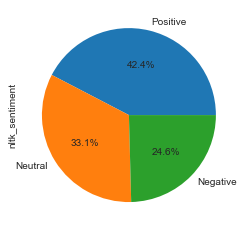

In [14]:
tweet_df['nltk_sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

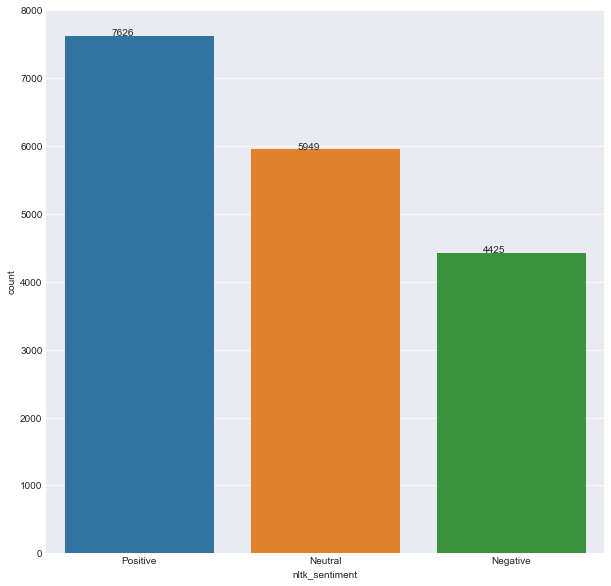

In [15]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=tweet_df["nltk_sentiment"],  data=tweet_df, order = tweet_df["nltk_sentiment"].value_counts().index )
for p, label in zip(ax.patches, tweet_df["nltk_sentiment"].value_counts()):   
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [16]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_positive = tweet_df[tweet_df['nltk_sentiment']=="Positive"]
df_negative = tweet_df[tweet_df['nltk_sentiment']=="Negative"]
df_neutral = tweet_df[tweet_df['nltk_sentiment']=="Neutral"]

tweet_All = " ".join(review for review in tweet_df.newcontent)
tweet_positive = " ".join(review for review in df_positive.newcontent)
tweet_negative= " ".join(review for review in df_negative.newcontent)
tweet_neutral= " ".join(review for review in df_neutral.newcontent)



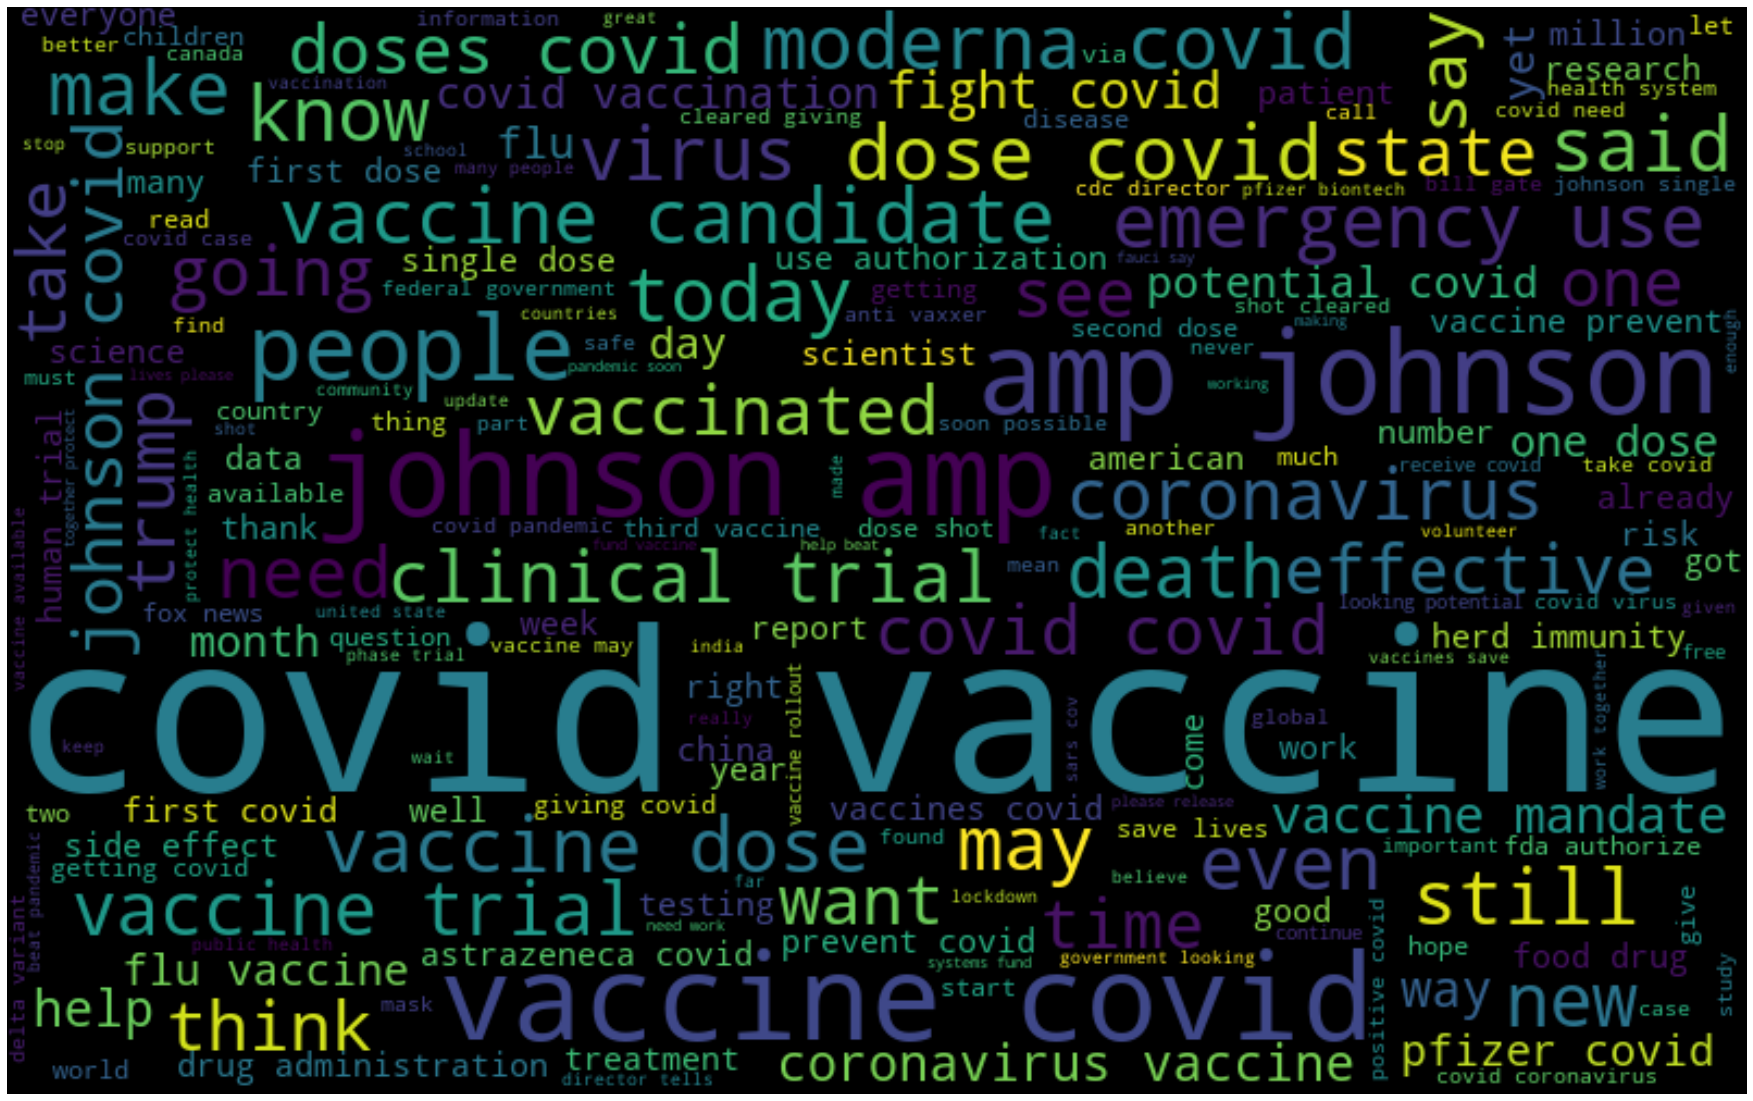

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(tweet_All)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


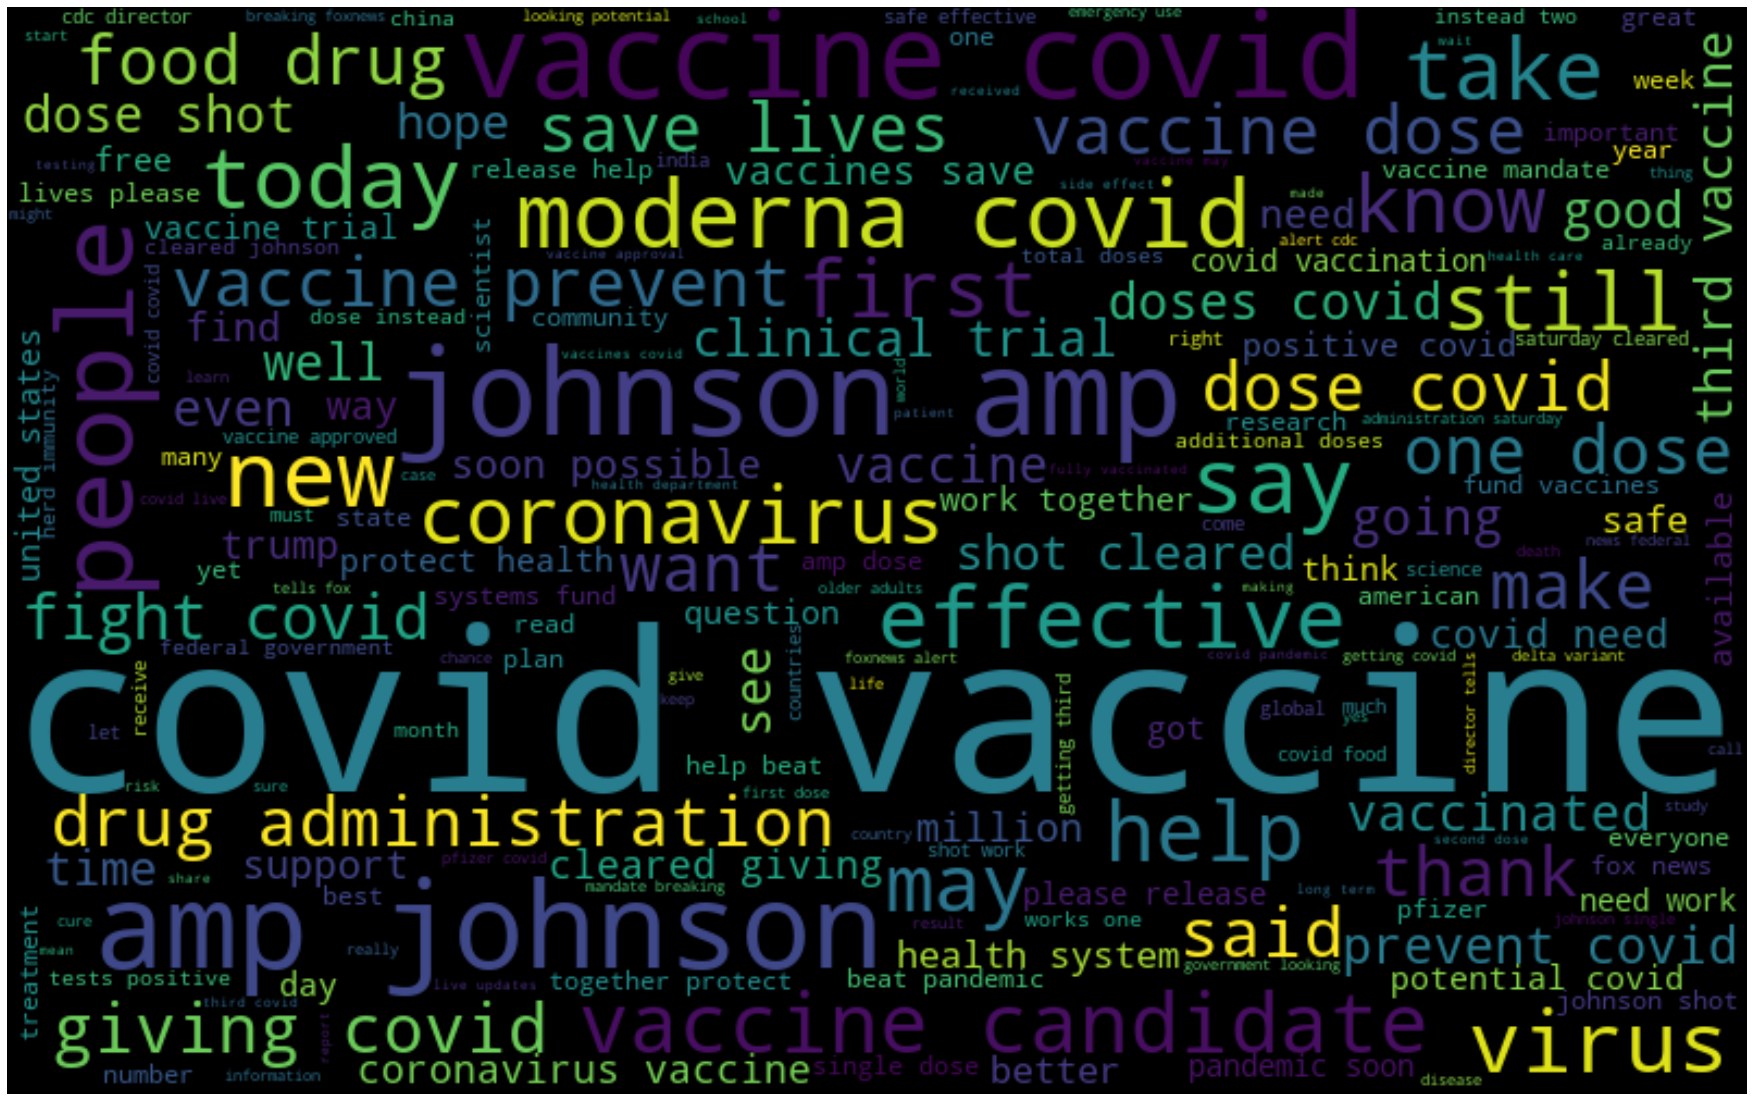

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(tweet_positive)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


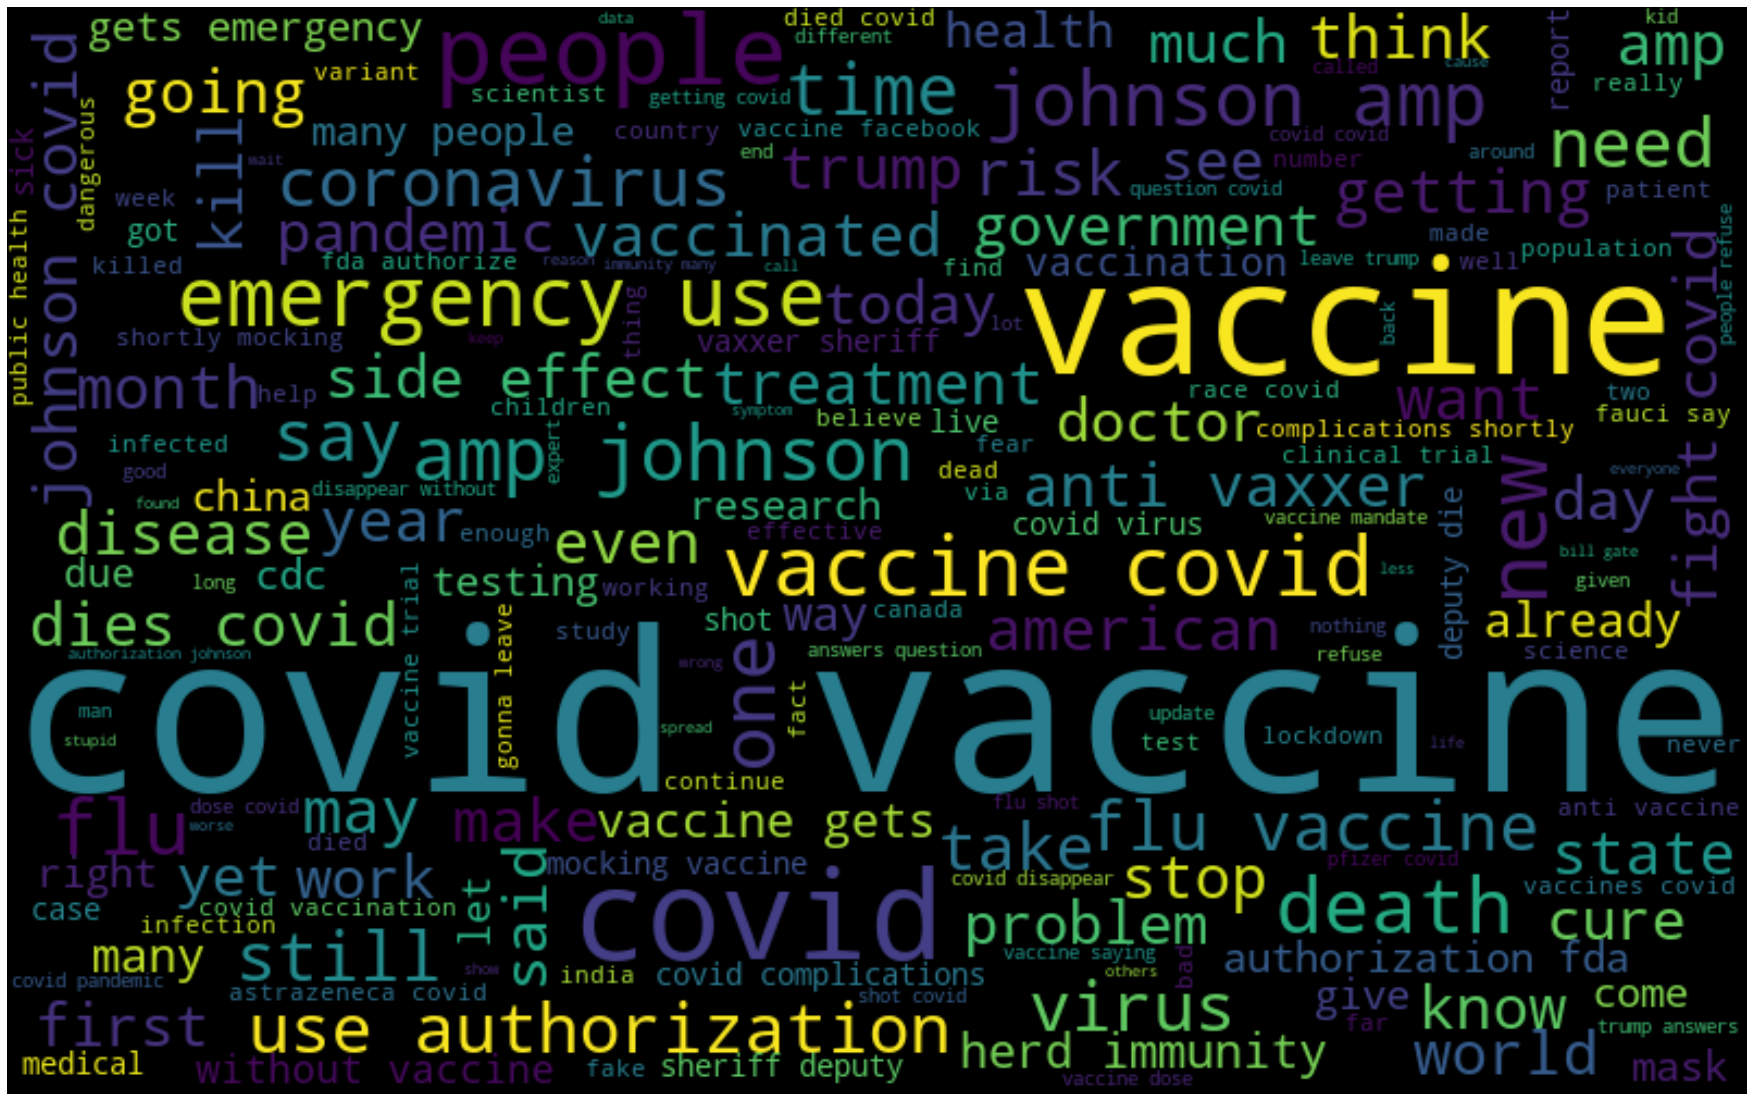

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(tweet_negative)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


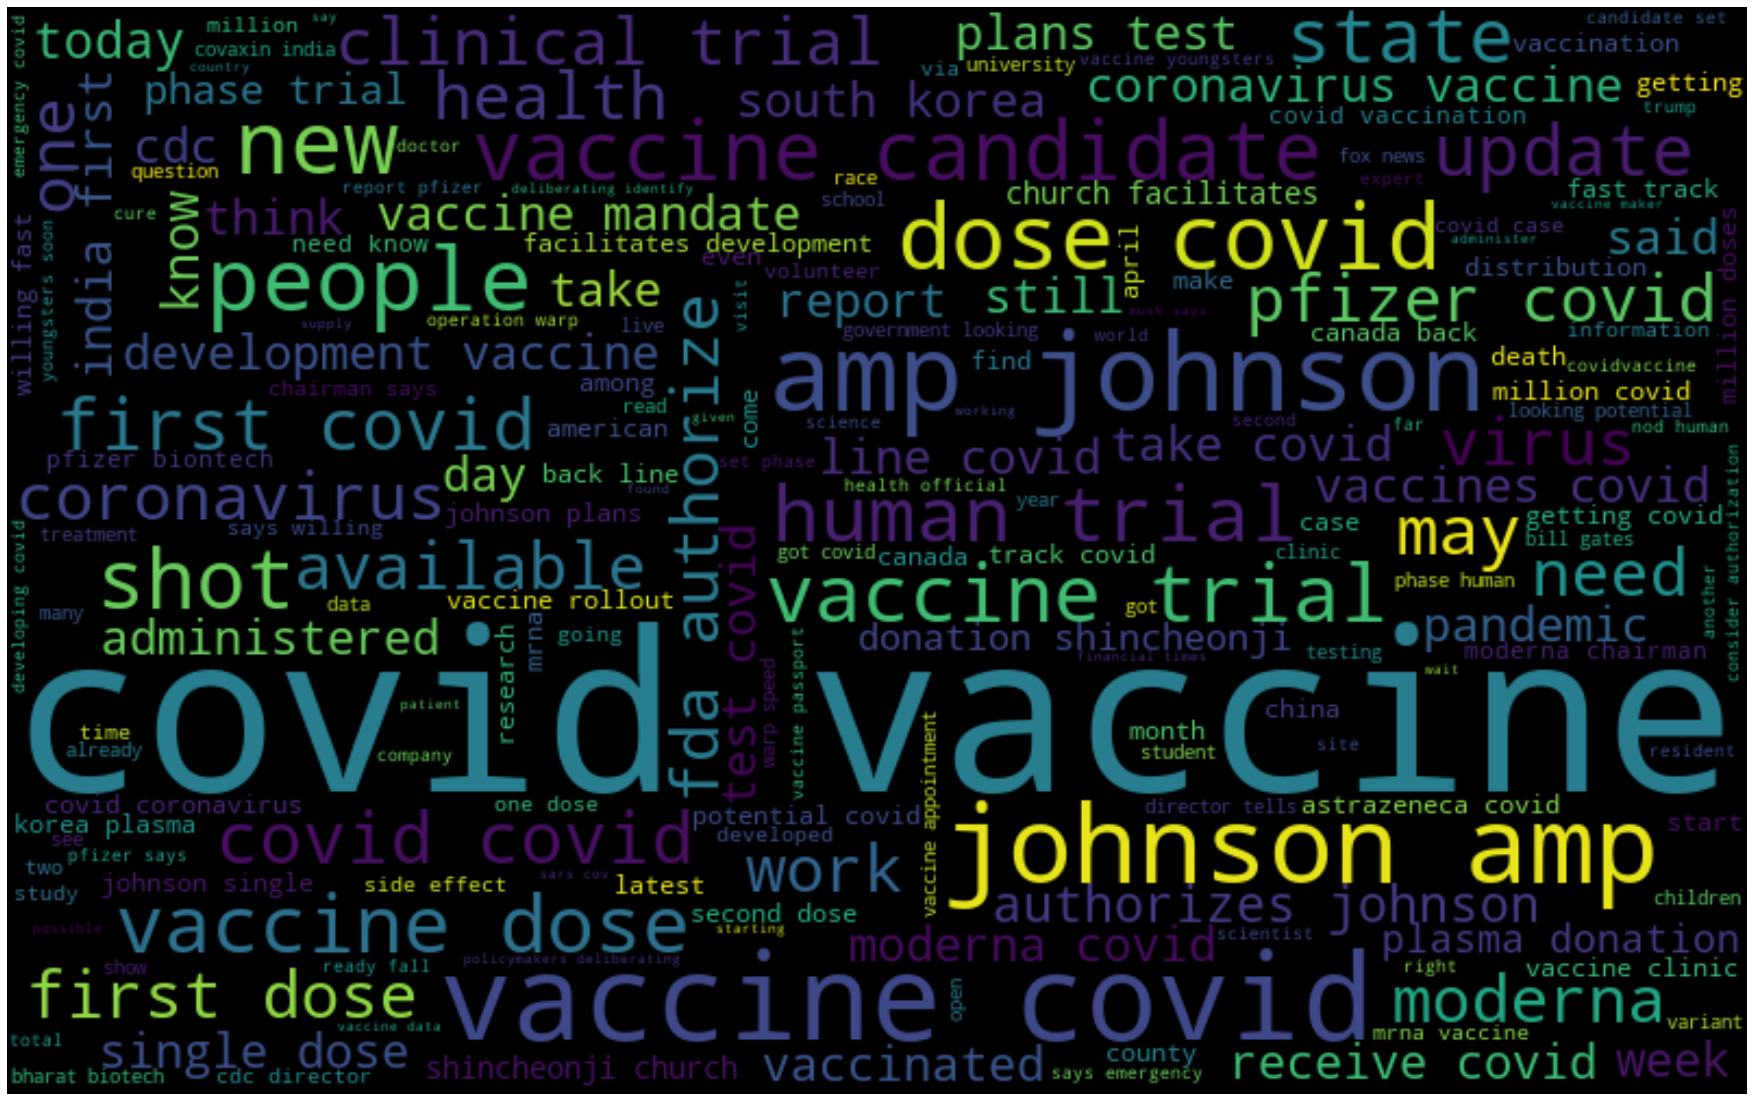

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(tweet_neutral)

plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


# Few high frequency tokens such as 'covid', 'vaccine', 'covid-vaccine' are frequently used in 3 categorical classes, Removing these words along with stops words would not impact the performance.

In [21]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['tweet_punct'] = tweet_df['newcontent'].apply(lambda x: remove_punct(x))


In [22]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [23]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

tweet_df['tweet_tokenized'] = tweet_df['tweet_punct'].apply(lambda x: tokenization(x.lower()))


In [24]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [25]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
stopword = stopwords.words('english')
custom_stop_word_list=['#','covid','covid-19',' covid ','vaccines' '# covid','covid vaccine', 'vaccine','covid 19 vaccine','coronavirus vaccine', 'covid #']
final_stopword_list = custom_stop_word_list + stopword

print(final_stopword_list)




['#', 'covid', 'covid-19', ' covid ', 'vaccines# covid', 'covid vaccine', 'vaccine', 'covid 19 vaccine', 'coronavirus vaccine', 'covid #', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how'

In [27]:
def remove_stopwords(text):
    text = [word for word in text if word not in final_stopword_list]
    return text
    
tweet_df['tweet_nonstop'] = tweet_df['tweet_tokenized'].apply(lambda x: remove_stopwords(x))

In [28]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [29]:
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
# df.head()

In [30]:
# wn = nltk.WordNetLemmatizer()

# def lemmatizer(text):
#     text = [wn.lemmatize(word) for word in text]
#     return text

# df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
# df.head()

In [31]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [word for word in tokens if word not in final_stopword_list]  # remove stopwords and stemming
    return text

In [32]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [33]:
tweet_df['tweet_nonstop']=tweet_df['tweet_nonstop'].apply(lambda x: ' '.join(x))

In [34]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tweet_df['content'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

18000 Number of tweets has 44944 words


In [35]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
#count_vect_df.sample(10)

In [36]:
import nltk
from nltk.util import ngrams
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
    
 
data = ' '.join(tweet_df['tweet_nonstop'].tail(3000))

In [37]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [38]:
print("4-gram: ", extract_ngrams(data, 4))



4-gram:  ['online users posted could', 'users posted could cause', 'posted could cause sterility', 'could cause sterility men', 'cause sterility men despite', 'sterility men despite recent', 'men despite recent study', 'despite recent study stating', 'recent study stating evidence', 'study stating evidence support', 'stating evidence support claims', 'evidence support claims attending', 'support claims attending made', 'claims attending made save', 'attending made save event', 'made save event national', 'save event national month', 'event national month action', 'national month action training', 'month action training talking', 'action training talking friends', 'training talking friends family', 'talking friends family vaccines', 'friends family vaccines sign', 'family vaccines sign join', 'vaccines sign join madetosave', 'sign join madetosave ron', 'join madetosave ron johnson', 'madetosave ron johnson defends', 'ron johnson defends news', 'johnson defends news conference', 'defends

In [39]:
from collections import Counter

a = extract_ngrams(data, 2)

c = Counter(a)

print(c.most_common(30))

[('delta variant', 132), ('fox news', 127), ('cdc director', 127), ('looking potential', 126), ('potential mandate', 126), ('government looking', 125), ('director tells', 123), ('tells fox', 97), ('federal government', 96), ('news federal', 95), ('third dose', 82), ('alert cdc', 73), ('fully vaccinated', 72), ('breaking foxnews', 71), ('foxnews alert', 70), ('mandate breaking', 63), ('health department', 60), ('recommends third', 60), ('dose immunocompromised', 58), ('quebec health', 57), ('department recommends', 57), ('side effects', 56), ('immunocompromised quebec', 51), ('get vaccinated', 43), ('pfizer biontech', 43), ('pfizer moderna', 38), ('second dose', 38), ('first dose', 35), ('sars cov', 35), ('vaccinated people', 35)]


In [40]:
type(c.most_common(15)[0])

tuple

In [41]:
aList = list(c.most_common(30))

In [42]:
aList

[('delta variant', 132),
 ('fox news', 127),
 ('cdc director', 127),
 ('looking potential', 126),
 ('potential mandate', 126),
 ('government looking', 125),
 ('director tells', 123),
 ('tells fox', 97),
 ('federal government', 96),
 ('news federal', 95),
 ('third dose', 82),
 ('alert cdc', 73),
 ('fully vaccinated', 72),
 ('breaking foxnews', 71),
 ('foxnews alert', 70),
 ('mandate breaking', 63),
 ('health department', 60),
 ('recommends third', 60),
 ('dose immunocompromised', 58),
 ('quebec health', 57),
 ('department recommends', 57),
 ('side effects', 56),
 ('immunocompromised quebec', 51),
 ('get vaccinated', 43),
 ('pfizer biontech', 43),
 ('pfizer moderna', 38),
 ('second dose', 38),
 ('first dose', 35),
 ('sars cov', 35),
 ('vaccinated people', 35)]

In [43]:
rolling_windows = tweet_df.rolling(100, min_periods=1)

rolling_mean = rolling_windows.mean()

print(rolling_mean)

         index            id  replyCount  retweetCount  likeCount  quoteCount  \
0          0.0  1.244776e+18        0.00      0.000000   1.000000        0.00   
1          0.5  1.244776e+18        0.00      0.500000   0.500000        0.00   
2          1.0  1.244776e+18        0.00      0.333333   0.333333        0.00   
3          1.5  1.244776e+18        0.00      0.250000   0.250000        0.00   
4          2.0  1.244776e+18        0.00      0.200000   0.800000        0.00   
...        ...           ...         ...           ...        ...         ...   
17995  17945.5  1.432462e+18        1.66     20.660000  42.860000        1.01   
17996  17946.5  1.432462e+18        1.66     20.670000  42.880000        1.01   
17997  17947.5  1.432462e+18        1.68     20.670000  42.920000        1.01   
17998  17948.5  1.432462e+18        1.68     20.670000  42.920000        1.01   
17999  17949.5  1.432462e+18        1.68     20.680000  42.950000        1.01   

       conversationId  retw

In [44]:
rolling_data=tweet_df['nltk_cmp_score'].rolling(200,min_periods=100).mean()

In [45]:
rolling_data = rolling_data.iloc[100:]

In [46]:
rolling_data.iplot()

In [47]:
tweet_df['label']=tweet_df['nltk_sentiment']

In [48]:
tweet_df.loc[tweet_df['label'] == "Positive", 'label'] = 1


In [49]:
tweet_df.loc[tweet_df['label'] == "Negative", 'label'] = 2


In [50]:
tweet_df.loc[tweet_df['label'] == "Neutral", 'label'] = 0


In [51]:
tweet_df

index                           _type  \
0          0  snscrape.modules.twitter.Tweet   
1          1  snscrape.modules.twitter.Tweet   
2          2  snscrape.modules.twitter.Tweet   
3          3  snscrape.modules.twitter.Tweet   
4          4  snscrape.modules.twitter.Tweet   
...      ...                             ...   
17995  17995  snscrape.modules.twitter.Tweet   
17996  17996  snscrape.modules.twitter.Tweet   
17997  17997  snscrape.modules.twitter.Tweet   
17998  17998  snscrape.modules.twitter.Tweet   
17999  17999  snscrape.modules.twitter.Tweet   

                                                                  url  \
0            https://twitter.com/purplgrl5/status/1244776302982451202   
1            https://twitter.com/scarfizal/status/1244776179921498120   
2              https://twitter.com/PDBiz33/status/1244776096135925760   
3              https://twitter.com/PDBiz33/status/1244775882780110848   
4        https://twitter.com/citrusstudios/status/1244775341694029824   
...                                                               ...   
17995         https://twitter.com/rmchavin/status/1432460697577816064   
17996        https://twitter.com/Labor_Law/status/1432460669207515137   
17997  https://twitter.com/DeschutesCounty/status/1432460626203381766   
17998  https://twitter.com/nationworldnews/status/1432460561959243777   
17999        https://twitter.com/CathBird5/status/1432460561032179712   

                     date  \
0     2020-03-30 23:59:32   
1     2020-03-30 23:59:02   
2     2020-03-30 23:58:42   
3     2020-03-30 23:57:51   
4     2020-03-30 23:55:42   
...                   ...   
17995 2021-08-30 21:50:18   
17996 2021-08-30 21:50:12   
17997 2021-08-30 21:50:01   
17998 2021-08-30 21:49:46   
17999 2021-08-30 21:49:46   

                                                                                                                                                                                                                                                                                                                     content  \
0                                  @g Also,  there is flu vaccine every year that only 46% of Americans get and that contributes to the death toll.  You can be sure the people who die from complications of the flu ( mostly from a viral pneumonia like Covid-19) are usually unvaccinated.  So it is highly likely those   
1                                                                                                                                                                                                               Coronavirus treatments: Chloroquine, vaccines and the drugs fighting COVID-19 - CNET https://t.co/mBTEjT9uU3   
2                                                                    COVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/k2UaovagPe   
3                        @barstoolsports @joerogan\n@bertkreischer \nCOVID-19 Vaccine has been under our kitchen sinks and noses all along.\nMembers of the WHO, Townsend and Daltrey confirm Tide PODS are the reason Millennials and Generation Zs are 30 times less likely to die from the virus. https://t.co/nSr8OxJ2X5   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Illness\nThere is currently no vaccine to prevent coronavirus disease in 2019 (COVID-19).\n\nThe best way to prevent illness is to avoid being exposed to this virus.\n\nRead more (link below) \nhttps://t.co/mbh0abdzMZ\n\n#coronavirus #covid19 https://t.co/PSdUokQGz3   
...                                                                                                                                                                                                                                                                                         

In [52]:
writer = pd.ExcelWriter('/Users/bindupriya/Desktop/Final-updated.xlsx')
# write dataframe to excel
tweet_df.to_excel(writer)
# save the excel
writer.save()

In [53]:
tweet_df.shape

(18000, 37)

In [54]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(tweet_df['tweet_nonstop'].values.astype('U'))


In [55]:
print(X)

  (0, 9655)	0.19222282697775553
  (0, 7585)	0.2236728441754674
  (0, 17809)	0.214919088342989
  (0, 17890)	0.27470095282818424
  (0, 9651)	0.1593085263402727
  (0, 12845)	0.2528827656612259
  (0, 18247)	0.2318204498400363
  (0, 10933)	0.26384326898314703
  (0, 3251)	0.21166139117087546
  (0, 4554)	0.19839274117103575
  (0, 12504)	0.11869670744360529
  (0, 16474)	0.1956420168996791
  (0, 17136)	0.2587000479146941
  (0, 4131)	0.1809346224001391
  (0, 3507)	0.3236251334683423
  (0, 6861)	0.11625315812953288
  (0, 609)	0.17898465802805874
  (0, 18977)	0.1565200455018967
  (0, 5746)	0.19200687221837034
  (0, 6381)	0.317814037121381
  (0, 550)	0.17275613760903083
  (1, 3013)	0.4953448265912189
  (1, 6214)	0.39658646401539055
  (1, 5059)	0.38904030789906435
  (1, 17972)	0.1473690110212865
  :	:
  (17997, 7440)	0.12820904698716765
  (17997, 6861)	0.11608117995760682
  (17998, 8093)	0.5633693267871808
  (17998, 13635)	0.36056900172940426
  (17998, 13952)	0.3577093315200086
  (17998, 10659)	0.39

In [56]:
Y=tweet_df['label'].values
Y=Y.astype('int')

In [57]:
np.unique(Y) 

array([0, 1, 2])

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)


In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [60]:
model=MultinomialNB()

In [61]:
model.fit(X_train, Y_train)

MultinomialNB()

In [62]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [63]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8034126984126985


In [64]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [65]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6864814814814815


In [66]:
X_test[91].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X_new = X_test[91]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('neutral')
elif (prediction[0]==1):
  print('positive')
else:
    print('negative')

[2]
negative
